In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

In [ ]:
# 섹션분류

In [79]:
d= pd.read_csv("/Users/KBS/Documents/CNU_Everytime_SentimentAnalysis/donga/donga_senti.csv",sep="\t",encoding="utf-8")
j= pd.read_csv("/Users/KBS/Documents/CNU_Everytime_SentimentAnalysis/joogang/joongang_senti.csv",sep="\t",encoding="utf-8")
c = pd.read_csv("/Users/KBS/Documents/CNU_Everytime_SentimentAnalysis/chosun/chosun_senti.csv",sep="\t",encoding="utf-8")

In [83]:
j['title'].dropna(inplace = True)
j['section'] = j['section'].fillna('no')


In [84]:
d_p = d[d['section'].str.contains('Politics')] ####
j_p = j[j['section'].str.contains('정치')] ####
c_p = c[c['section'].str.contains('정치')] ####

In [85]:
dj = pd.concat([d_p, j_p], axis = 0)

In [87]:
cjd = pd.concat([dj,c_p], axis = 0)

In [95]:
d_e = d[d['section'].str.contains('Economy')] ####
j_e = j[j['section'].str.contains('경제')] ####
c_e = c[c['section'].str.contains('경제')] ####

In [96]:
dj_e = pd.concat([d_e, j_e], axis = 0)

In [97]:
cjd_e = pd.concat([dj_e,c_e], axis = 0)

In [88]:
cjd 

,title,content,date,section,url,title_senti
0,"“NLL 침범 ‘무포호’, 과거 제3국서 등록 취소…최근까지 중국 입항” VOA",\n서해 북방한계선(NLL)을 침범했다 퇴각한 북한 상선 ‘무포호’가 과거 토고 등...,2022-10-25 06:58,Politics,https://www.donga.com/news/Politics/article/al...,0.148715
1,"北, 中당대회 끝나자 서해NLL 도발… 7차 핵실험 ‘명분 쌓기’","\n먼저 월선하고도 “南이 도발” 트집\r\n北, 완충해역 포격… 9·19합의 위반...",2022-10-25 03:00,Politics,https://www.donga.com/news/Politics/article/al...,0.678253
2,"檢, 민주硏 압수수색-정진상 출금… 민주 “野 말살”","\n檢, 김용 쓰던 PC서 문서파일 확보\r\n이틀째 金 불러 8억 용처 등 조사\...",2022-10-25 03:00,Politics,https://www.donga.com/news/Politics/article/al...,0.087201
3,"이재명 “대장동 특검, 尹관련 저축銀 부분 빼도 좋다”",\n“김건희 특검과 무관” 수위 낮추며\r\n본인 수사 ‘檢 아닌 특검’ 뜻 내비쳐...,2022-10-25 03:00,Politics,https://www.donga.com/news/Politics/article/al...,0.916447
4,"민주당, 오늘 尹대통령 국회 시정연설 보이콧… 尹 “시정연설에 조건, 헌정사서 들어...",\n박홍근 “당사 침탈 사과요구 무시”\r\n정진석 “시정연설은 국민 위한 것”\n...,2022-10-25 03:00,Politics,https://www.donga.com/news/Politics/article/al...,0.677403
...,...,...,...,...,...,...
24698,"한동훈에 “화내는 모습 부적절” 지적한 김남국, 잠시 후 “이 사람아” 고성",24일 법제사법위원회 국정감사에서 화제가 된 장면은 한동훈 법무부 장관과 김의겸 더...,2022.10.25 10:25,정치,https://www.chosun.com/politics/politics_gener...,0.550482
24701,“尹·韓 새벽 3시까지 술자리” 더탐사 방송… 술집 위치도 특정 못했다,윤석열 대통령과 한동훈 법무장관의 '심야 술자리 의혹'을 제기한 인터넷매체 '더탐사...,2022.10.25 07:45,정치,https://www.chosun.com/politics/politics_gener...,0.036540
24706,尹·韓 술자리에 있었다고 주장한 첼리스트 정체는...개딸? 걸그룹 출신?,친민주당 성향의 유튜브 채널 ‘더 탐사’(옛 열린공감TV)와 김의겸 더불어민주당 의...,2022.10.25 14:16,정치,https://www.chosun.com/politics/politics_gener...,0.168550
24708,"한동훈에 “화내는 모습 부적절” 지적한 김남국, 잠시 후 “이 사람아” 고성",24일 법제사법위원회 국정감사에서 화제가 된 장면은 한동훈 법무부 장관과 김의겸 더...,2022.10.25 10:25,정치,https://www.chosun.com/politics/politics_gener...,0.550482


In [124]:
zzz = pd.read_excel("/Users/KBS/Documents/CNU_Everytime_SentimentAnalysis/chosun1.xlsx") # 섹션 없이 신문사별
zzz.head()

,date,chosun,joongang,donga
0,2021-09-10,0.399658,0.390227,0.595858
1,2021-09-11,0.654594,0.368557,0.455628
2,2021-09-12,0.400858,0.401121,0.386680
3,2021-09-13,0.549362,0.396291,0.527931
4,2021-09-14,0.547167,0.392135,0.566240


In [ ]:
# 조중동 정치 감성점수 분포

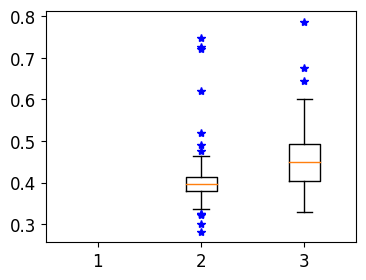

In [131]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots()


plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12
ax.boxplot([zzz['chosun'], zzz['joongang'], zzz['donga']], sym="b*")
plt.show()




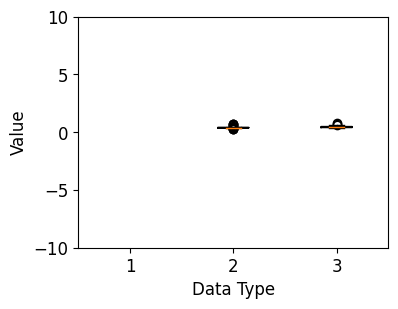

In [127]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 3. 그래프 그리기
fig, ax = plt.subplots()

box = ax.boxplot([zzz['chosun'], zzz['joongang'],zzz['donga']], notch=True, whis=1.5)

ax.set_ylim(-10.0, 10.0)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

plt.show()

In [113]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

In [114]:
plt.figure(figsize=(12,5))
ax.boxplot([cjd['title_senti'],[cjd['title_senti']]
ax.set_xlabel('Article Title Senti')


SyntaxError: invalid syntax (1759688163.py, line 4)

In [55]:
tokenizer = Okt()
cjd["tokenized"] = cjd["title"].apply(str).apply(tokenizer.nouns)

In [62]:

cjd[cjd['section']=='title']['tokenized'].values

array([], dtype=object)

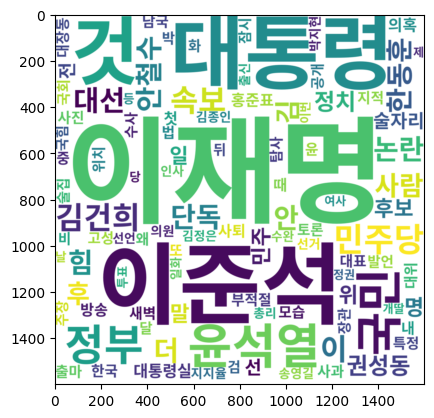

In [65]:
cjd = np.hstack(cjd[cjd['section']=='정치' & 'title']['tokenized'].values) ####
cjd = Counter(cjd)#
cjd = cjd.most_common(100)#
cjd= dict(cjd)#
wc = WordCloud(
    font_path= '/Library/Fonts/NotoSansKR-Bold.otf',
    background_color='white',
    width=1600,
    height=1600,
)
wc_img = wc.generate_from_frequencies(cjd) #
wc_img.to_file('cjd_p_title.jpg')
plt.imshow(wc, interpolation = 'bilinear')